In [22]:
#Defining Classes of Objects

import numpy as np
import matplotlib.pyplot as plt
import math as mt
from mpl_toolkits.mplot3d import Axes3D

class point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

class body:
    def __init__(self, loc, vel, mass, name=""):
        self.loc = loc
        self.vel = vel
        self.mass = mass
        self.name = name


In [23]:
#Defining step increment function

def step(point1, point2, dt):
    inc = point(0, 0, 0)
    inc.x = point1.x + point2.x * dt
    inc.y = point1.y + point2.y * dt
    inc.z = point1.z + point2.z * dt
    return inc


In an N-body system of masses, the acceleration of a body using Newton's law of Gravitational Attraction is given by:

$$ a_ix = \sum_{i \neq j}^{j} \frac{Gm_j(x_j - x_i)}{((x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2)^(\frac{3}{2})}  \hat{x} $$

In [24]:

#Defining functions to calculate acceleration, velocity and location using RK4

def calc_acc(bodies, b_i):
    G = 6.674e-11 #m3 kg-1 s-2
    acc = point(0, 0, 0)
    target_bod = bodies[b_i]
       
    k1 = point(0, 0, 0)
    k2 = point(0, 0, 0)
    k3 = point(0, 0, 0)
    k4 = point(0, 0, 0)
    t_loc = point(0, 0, 0)
    t_vel = point(0, 0, 0)
    dt = 1e2
        
    for i, ext_bod in enumerate(bodies):
        if i != b_i:
            r = (target_bod.loc.x - ext_bod.loc.x)**2 + (target_bod.loc.y - ext_bod.loc.y)**2 + (target_bod.loc.z - ext_bod.loc.z)**2
            r = mt.sqrt(r)
            t = (G * ext_bod.mass) / r**3
            
                
            k1.x = t * (ext_bod.loc.x - target_bod.loc.x)
            k1.y = t * (ext_bod.loc.y - target_bod.loc.y) 
            k1.z = t * (ext_bod.loc.z - target_bod.loc.z)
            
            t_vel = step(target_bod.vel, k1, 0.5)
            t_loc = step(target_bod.loc, t_vel, 0.5 * dt)
            
            k2.x = t * (ext_bod.loc.x - t_loc.x) 
            k2.y = t * (ext_bod.loc.y - t_loc.y) 
            k2.z = t * (ext_bod.loc.z - t_loc.z) 
                
            t_vel = step(target_bod.vel, k2, 0.5)
            t_loc = step(target_bod.loc, t_vel, 0.5 * dt)
                
            k3.x = t * (ext_bod.loc.x - t_loc.x) 
            k3.y = t * (ext_bod.loc.y - t_loc.y) 
            k3.z = t * (ext_bod.loc.z - t_loc.z) 
            
            t_vel = step(target_bod.vel, k3, 1)
            t_loc = step(target_bod.loc, t_vel, dt)
                
            k4.x = t * (ext_bod.loc.x - t_loc.x) 
            k4.y = t * (ext_bod.loc.y - t_loc.y) 
            k4.z = t * (ext_bod.loc.z - t_loc.z) 
                
            acc.x += (k1.x + 2*k2.x + 2*k3.x + k4.x) / 6
            acc.y += (k1.y + 2*k2.y + 2*k3.y + k4.y) / 6
            acc.z += (k1.z + 2*k2.z + 2*k3.z + k4.z) / 6
                
    return acc
    
def calc_loc(bodies, dt = 1):
    for target_bod in bodies:
        target_bod.loc.x += target_bod.vel.x * dt
        target_bod.loc.y += target_bod.vel.y * dt
        target_bod.loc.z += target_bod.vel.z * dt
                
def calc_vel(bodies, dt = 1):
    for b_i, target_bod in enumerate(bodies):
        acc = calc_acc(bodies, b_i)
        target_bod.vel.x += acc.x * dt
        target_bod.vel.y += acc.y * dt
        target_bod.vel.z += acc.z * dt
            
def calc_grav_step(bodies, dt = 1):
    calc_vel(bodies, dt = dt)
    calc_loc(bodies, dt = dt)
        
                
            

In [25]:
#Simulation function to store parameter lists 

def sim(bodies, names = None, dt = 1, steps = 1e4, freq = 1e2):
    body_loc_hist = []
    for curr_bod in bodies:
        body_loc_hist.append({"x":[], "y":[], "z":[], "name":curr_bod.name})
    for j in range(1, int(steps)):
        calc_grav_step(bodies, dt = 1e4)
        
        if j % freq == 0:
            for i, body_loc in enumerate(body_loc_hist):
                body_loc["x"].append(bodies[i].loc.x)
                body_loc["y"].append(bodies[i].loc.y)
                body_loc["z"].append(bodies[i].loc.z)
    return body_loc_hist

In [26]:
#PLotting Function 

def plot_out(bodies, outfile = None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection = '3d')
    max_range = 0
    for curr_bod in bodies:
        max_dim = max(max(curr_bod["x"]), max(curr_bod["y"]), max(curr_bod["z"]))
        if max_dim > max_range:
            max_range = max_dim
        ax.plot(curr_bod["x"], curr_bod["y"], curr_bod["z"], label = curr_bod["name"])
    ax.set_xlim([-max_range,max_range])
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    ax.legend()
    
    if outfile:
        plt.savefig()
    else:
        plt.show()
        
        

In [27]:
sun = {"location":point(0,0,0), "mass":2e30, "velocity":point(0,0,0)}
mercury = {"location":point(0,5.7e10,0), "mass":3.285e23, "velocity":point(47000,0,0)}
venus = {"location":point(0,1.1e11,0), "mass":4.8e24, "velocity":point(35000,0,0)}
earth = {"location":point(0,1.5e11,0), "mass":6e24, "velocity":point(30000,0,0)}
mars = {"location":point(0,2.2e11,0), "mass":2.4e24, "velocity":point(24000,0,0)}
jupiter = {"location":point(0,7.7e11,0), "mass":1e28, "velocity":point(13000,0,0)}
saturn = {"location":point(0,1.4e12,0), "mass":5.7e26, "velocity":point(9000,0,0)}
uranus = {"location":point(0,2.8e12,0), "mass":8.7e25, "velocity":point(6835,0,0)}
neptune = {"location":point(0,4.5e12,0), "mass":1e26, "velocity":point(5477,0,0)}
pluto = {"location":point(0,3.7e12,0), "mass":1.3e22, "velocity":point(4748,0,0)}
sat = {"location":point(0,1e10,0), "mass":1e23, "velocity":point(3e4,0,0)}

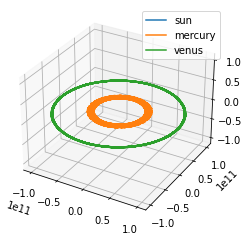

In [21]:
#Driver Code

bodies = [
    body(loc = sun["location"], vel = sun["velocity"], mass = sun["mass"], name = "sun"),
    body(loc = mercury["location"], vel = mercury["velocity"], mass = mercury["mass"], name = "mercury"),
    body(loc = venus["location"], vel = venus["velocity"], mass = venus["mass"], name = "venus")
    ]
motion = sim(bodies, dt = 1e3, steps = 1e5, freq = 1e2)
plot_out(motion, outfile = 'O')